<a href="https://colab.research.google.com/github/DionesGouvea/ENEM/blob/main/ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Contexto analíico**

A área de marketing de uma EdTech quer mapear os perfis dos candidatos do ENEM e, nesse projeto, os analistas precisam entender quais características estão associadas a um bom ou mau desempenho de um candidato na prova. 

**INTERPRETABILIDADE** - Construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para os analistas no quesito desempenho do candidato no exame. Ou seja, o foco será na interpretação dos coeficientes (exemplo: se o candidato for de uma escola pública o valor Y da sua nota média irá aumentar quanto?).

**PREDIÇÃO** -  Construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como preditora de desempenho. Note que, em casos como esse, queremos ter o menor erro possível, mesmo que o modelo seja complexo e tenha uma interpretação mais difícil.

## Importando os Dados e Bibliotecas

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [59]:
from google.colab import drive 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Analise Exploratoria

In [60]:
df = pd.read_csv('/content/gdrive/MyDrive/Tera/Data/Base_Enem.csv')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,210054403757,2021,14,M,2,3,1,1,15,1,...,A,A,B,A,A,B,A,A,A,NaN
1,210053662224,2021,5,F,1,3,1,1,4,1,...,A,A,B,A,A,C,A,B,B,546.56
2,210053154359,2021,14,F,0,3,1,1,12,1,...,A,A,B,A,A,B,A,A,A,431.38
3,210054036560,2021,3,F,1,4,1,2,0,2,...,A,A,B,A,A,C,A,A,B,565.80
4,210051462654,2021,2,F,1,4,1,2,0,3,...,A,A,E,A,A,E,A,B,B,576.12


In [61]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168979 entries, 0 to 168978
Data columns (total 77 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            168979 non-null  int64  
 1   NU_ANO                  168979 non-null  int64  
 2   TP_FAIXA_ETARIA         168979 non-null  int64  
 3   TP_SEXO                 168979 non-null  object 
 4   TP_ESTADO_CIVIL         168979 non-null  int64  
 5   TP_COR_RACA             168979 non-null  int64  
 6   TP_NACIONALIDADE        168979 non-null  int64  
 7   TP_ST_CONCLUSAO         168979 non-null  int64  
 8   TP_ANO_CONCLUIU         168979 non-null  int64  
 9   TP_ESCOLA               168979 non-null  int64  
 10  TP_ENSINO               53356 non-null   float64
 11  IN_TREINEIRO            168979 non-null  int64  
 12  CO_MUNICIPIO_ESC        39736 non-null   float64
 13  NO_MUNICIPIO_ESC        39736 non-null   object 
 14  CO_UF_ESC           

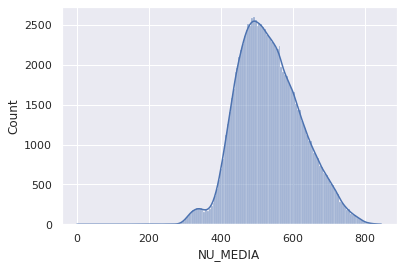

In [62]:
#verificando a distribuição da nossa variavel target 
sns.set_theme()
sns.histplot(df['NU_MEDIA'], kde = 'True')

Text(0, 0.5, 'Numero de Estudantes')

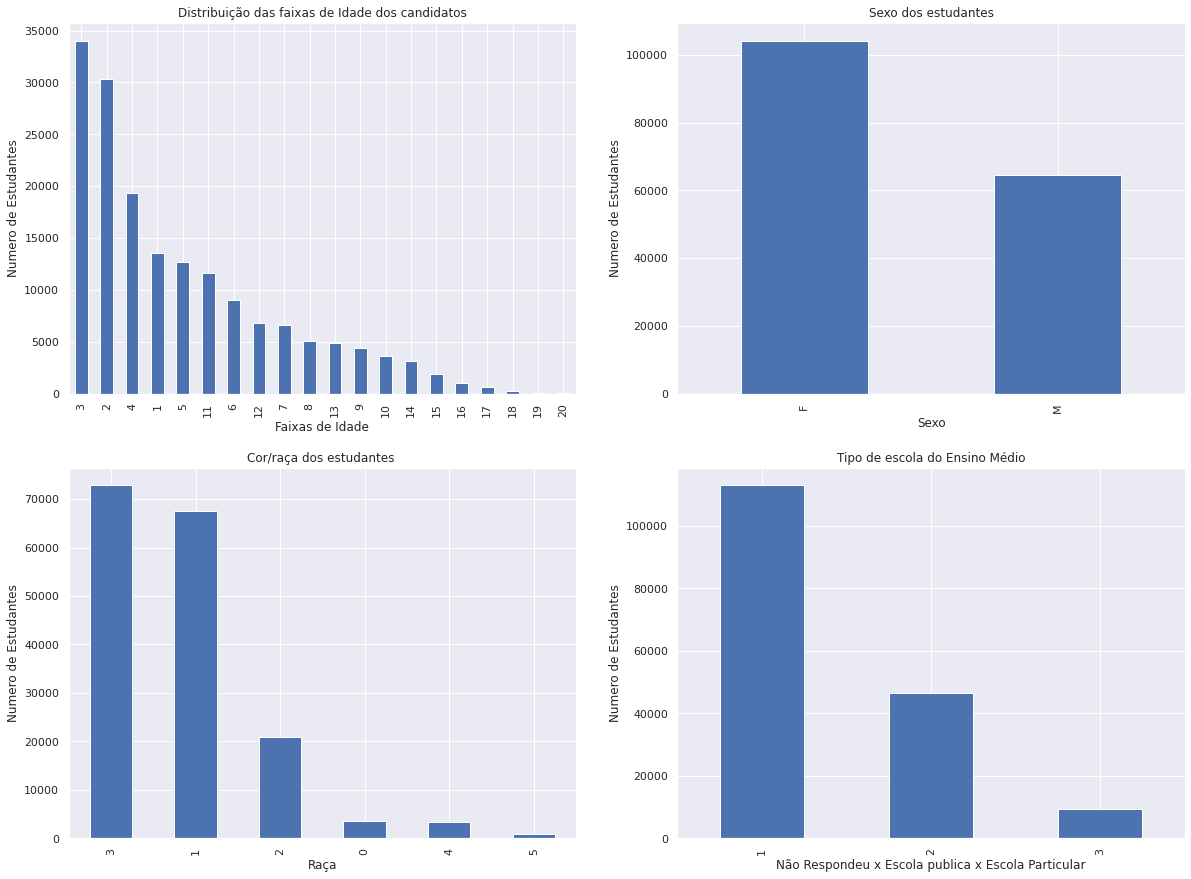

In [63]:
#verificando algumas distribuições 
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
df.TP_FAIXA_ETARIA.value_counts().plot(kind='bar')
plt.title('Distribuição das faixas de Idade dos candidatos')
plt.xlabel('Faixas de Idade')
plt.ylabel('Numero de Estudantes')

plt.subplot(2,2,2)
df.TP_SEXO.value_counts().plot(kind='bar')
plt.title('Sexo dos estudantes')
plt.xlabel('Sexo')
plt.ylabel('Numero de Estudantes')

plt.subplot(2,2,3)
df.TP_COR_RACA.value_counts().plot(kind='bar')
plt.title('Cor/raça dos estudantes ')
plt.xlabel('Raça')
plt.ylabel('Numero de Estudantes')

plt.subplot(2,2,4)
df.TP_ESCOLA.value_counts().plot(kind='bar')
plt.title('Tipo de escola do Ensino Médio')
plt.xlabel('Não Respondeu x Escola publica x Escola Particular')
plt.ylabel('Numero de Estudantes')

###Mapeando algumas colunas para melhor entendimento 

In [64]:
df_backup = df

In [65]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({0:'Não_declarado',1:"Branca",2:'Preta',3:'Parda',4:'Amarela',5:'Indígena',6:'Sem_informação'})
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'Nao_respondeu', 2:'Escola_Publica', 3:'Escola_particular' })

###Analise Bivariada 

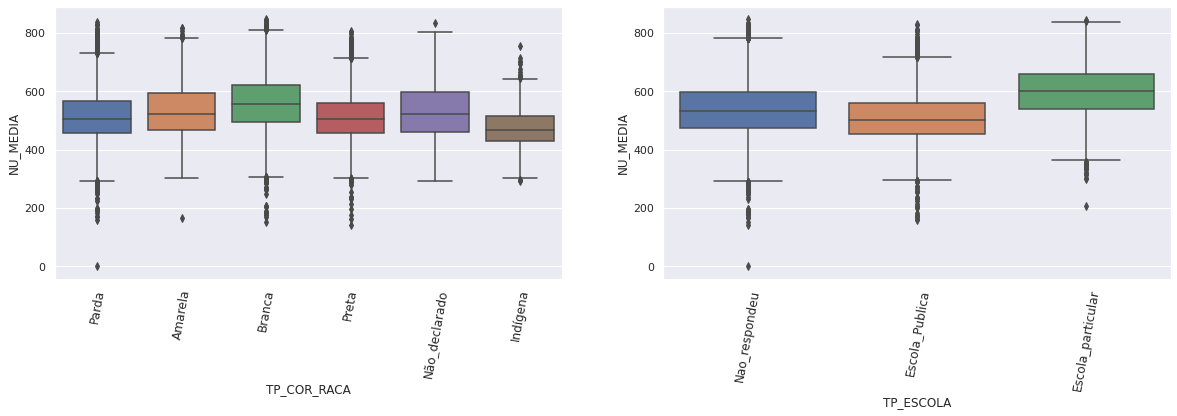

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'TP_COR_RACA', y='NU_MEDIA', data = df)
plt.xticks(fontsize = 12,rotation =80);

plt.subplot(1,2,2)
sns.boxplot(x = 'TP_ESCOLA', y='NU_MEDIA', data = df)
plt.xticks(fontsize = 12,rotation =80);

É possivel perceber que o fato de ter estudado em escola publica ou privada e raça/etnia afetam na nota do aluno 

In [67]:
#Criando uma matriz para visualizar o questionario 

quest = [['Q001','Q002'],['Q003','Q004'],['Q005','Q006'],['Q007','Q008'],['Q009','Q010'],['Q011','Q012'],['Q013','Q014'],['Q015','Q016']
,['Q017','Q018'],['Q019','Q020'],['Q021','Q022'],['Q023','Q024'],['Q025','']]

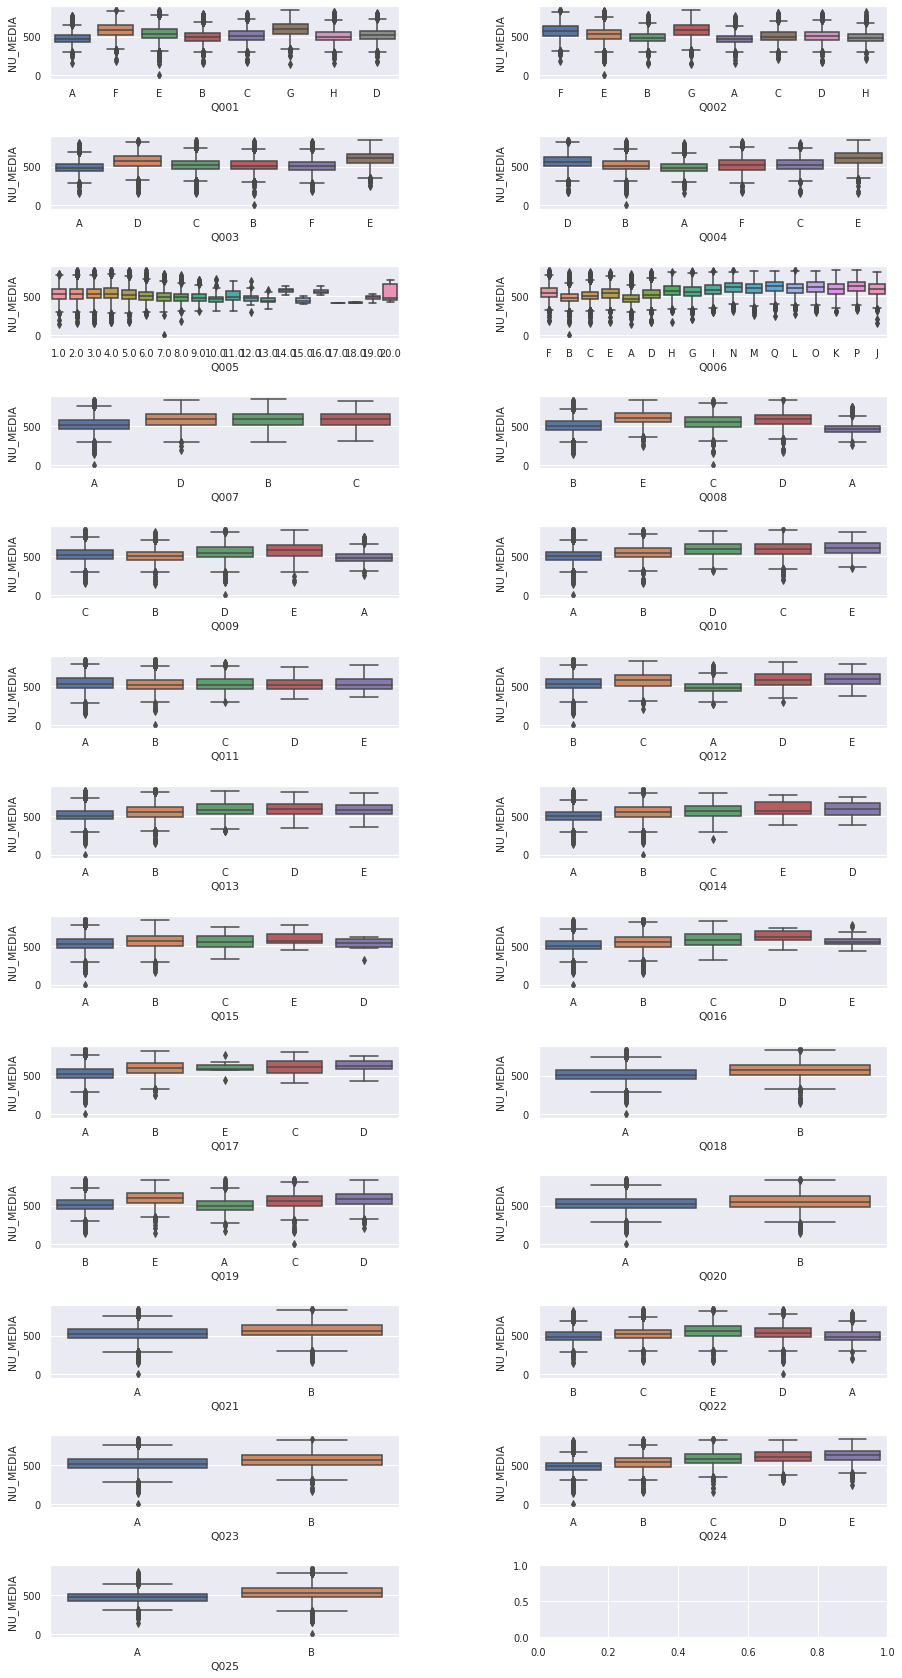

In [68]:
#Visualizando a relação do questionario com a variavel target
sns.set(font_scale=0.9)
fig, eixo = plt.subplots(13,2,figsize=(15,30)) # Criando uma figura de 22 linhas x 2 colunas para nossa matriz
fig.subplots_adjust(hspace=0.8, wspace=0.4)
# Para cada linha 
for linha in range(13):
    # Para cada coluna   
    for coluna in range(2): 
      try:
        sns.boxplot(data=df,x=quest[linha][coluna],y='NU_MEDIA',ax=eixo[linha][coluna])
      except ValueError:
        pass  

O principal foco do questionario e entender as condições socioeconomicas dos candidatos que realizaram a prova, fica claro que pessoas que possuem familiares que tem ensino superior, melhores condições financeiras,acesso a tecnologia, e maior numero de bens, tem maiores chances de ter um melhor desempenho no ENEM.

## Tratando os dados nulos e redmensionando, excluindo algumas features

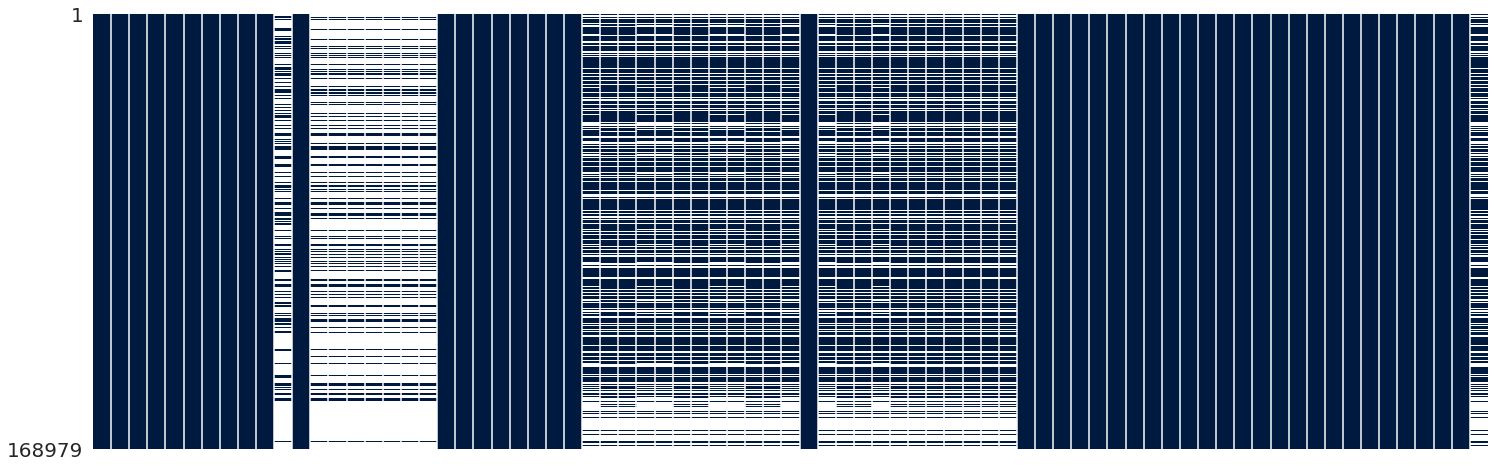

In [69]:
import missingno as msno
msno.matrix(df, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

In [70]:
nans = df.isna().sum()
nans = nans[nans > 0]/len(df)
nans = nans[nans > 0.40]
nans

TP_ENSINO                 0.684245
CO_MUNICIPIO_ESC          0.764847
NO_MUNICIPIO_ESC          0.764847
CO_UF_ESC                 0.764847
SG_UF_ESC                 0.764847
TP_DEPENDENCIA_ADM_ESC    0.764847
TP_LOCALIZACAO_ESC        0.764847
TP_SIT_FUNC_ESC           0.764847
dtype: float64

Para essas features achei melhor dropar as colunas por possuir muitos dados faltantes.

In [71]:
#Dropando as colunas que possuem muitos dados faltantes 
remove = ['TP_ENSINO','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC']
df.drop(remove,axis =1, inplace = True)

In [73]:
#dropando as linhas com dados nulos da nossa variavel target 
df = df.dropna(subset=['NU_MEDIA'], axis=0)

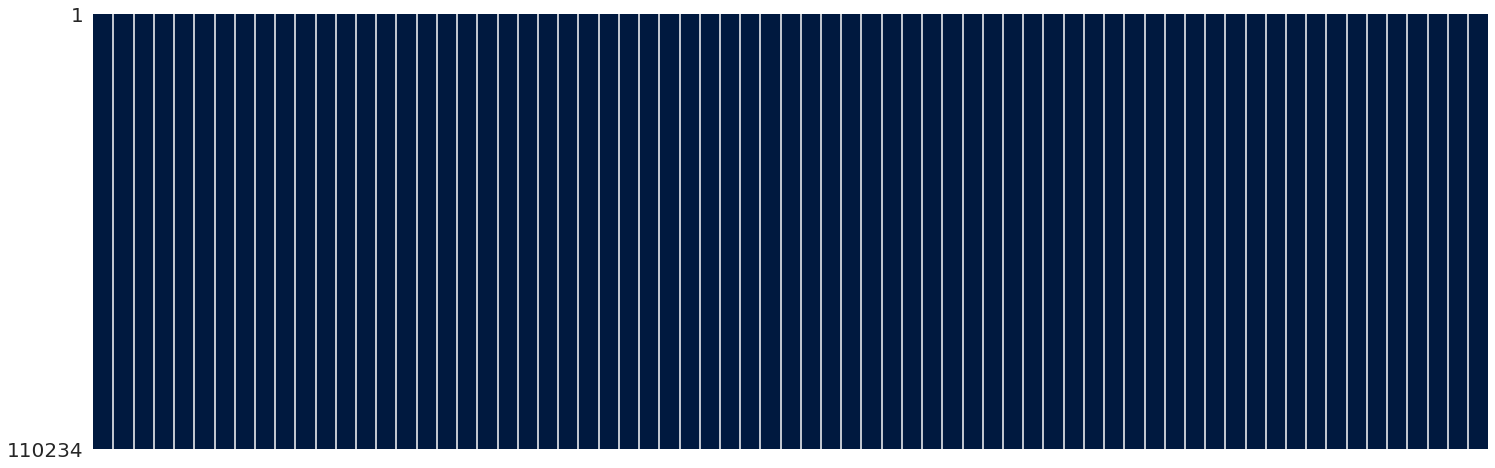

In [74]:
msno.matrix(df, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

#### Tratando valores redundantes, excluindo algumas features.
Algumas de nossas features categoricas possuem muitos valores que por vezes podem ser redundantes ou pouco relevantes, vou tentar diminuir isto para facilitar no encoding.


In [75]:

#Todo valor maior que 11 sera 12, caso contrario mantenha o mesmo valor 
df['TP_FAIXA_ETARIA'] = np.where(df['TP_FAIXA_ETARIA'] > 11, 12, df['TP_FAIXA_ETARIA'])

#todo valor igual a 1 sera B caso contrario sera A (A = Outro, B = Solteiro)
df['TP_ESTADO_CIVIL'] = np.where(df['TP_ESTADO_CIVIL'] == 1 , 'B', 'A')


#Se o valor for igual a 1 ou 4, ele será substituído por 'B';
#Se o valor for igual a 2, 3 ou 5, ele será substituído por 'C';
#Caso contrário, o valor será substituído por 'A'.
#A = Nao sabe/respondeu, B = Branco/Amarelo, C = Preto/Pardo/Indigena
df['TP_COR_RACA'] = np.where(df['TP_COR_RACA'].isin([1,4]) , 'B',
                            np.where(df['TP_COR_RACA'].isin([2,3,5]) , 'C', 'A'))



#A = Nao resp/Estrangeiro, B = Brasileiro
df['TP_NACIONALIDADE'] = np.where(df['TP_NACIONALIDADE'].isin([1,2,4]) , 'B', 'A')

#A = Sem resp, B = Publica, C = Privada
df['TP_ESCOLA'] = np.where(df['TP_ESCOLA'].isin([2]) , 'B',
                            np.where(df['TP_ESCOLA'].isin([3]) , 'C', 'A'))


#A = Não, B = Sim
df['IN_TREINEIRO'] = np.where(df['IN_TREINEIRO'].isin([1]) , 'B', 'A')

#A = Inglês, B = Espanhol
df['TP_LINGUA'] = np.where(df['TP_LINGUA'].isin([1]) , 'B', 'A')

#diminuindo o numero de classes de renda de 16 para 5 baseando se em: https://cps.fgv.br/qual-faixa-de-renda-familiar-das-classes
ClasseB = ['P', 'O', 'N', 'M', 'L', 'K']
ClasseC = ['J', 'I', 'H', 'G', 'F']
ClasseD = ['E', 'D', 'C']
ClasseE = ['A', 'B']
df['Q006'] = np.where(df['Q006'].isin(ClasseE), 'A', 
                          (np.where(df['Q006'].isin(ClasseD), 'B',
                                   np.where(df['Q006'].isin(ClasseC), 'C',
                                             np.where(df['Q006'].isin(ClasseB), 'D', 'E')))))

In [76]:
#features para serem excluidas. 
droplist =[  "NU_INSCRICAO", 
             "NU_ANO",
             "TP_ST_CONCLUSAO",
             "TP_ANO_CONCLUIU",
             "CO_MUNICIPIO_PROVA",
             "NO_MUNICIPIO_PROVA",
             "CO_UF_PROVA",
             "TP_PRESENCA_CN",
             "TP_PRESENCA_CH",
             "TP_PRESENCA_LC",
             "TP_PRESENCA_MT",
             "NU_NOTA_CN",
             "NU_NOTA_CH",
             "NU_NOTA_LC",
             "NU_NOTA_MT",
             "TX_RESPOSTAS_CN",
             "TX_RESPOSTAS_CH",
             "TX_RESPOSTAS_LC",
             "TX_RESPOSTAS_MT",
             "TX_GABARITO_CN",
             "TX_GABARITO_CH",
             "TX_GABARITO_LC",
             "TX_GABARITO_MT",
             "TP_STATUS_REDACAO",
             "NU_NOTA_COMP1",
             "NU_NOTA_COMP2",
             "NU_NOTA_COMP3",
             "NU_NOTA_COMP4",
             "NU_NOTA_COMP5",
             "NU_NOTA_REDACAO",
             "CO_PROVA_CN",
             "CO_PROVA_CH",
             "CO_PROVA_LC",
             "CO_PROVA_MT"]


## criando algumas listas de features semelhantes para fazer uma alteração em massa 

#Colunas com a escolaridade dos Pais
escolaridade_cols =["Q001", "Q002"]

#Colunas com contagens de bens
questoes = ["Q007","Q008","Q009","Q010","Q011","Q012","Q013","Q014","Q015","Q016","Q017",
            "Q018","Q019","Q020","Q021","Q022","Q023","Q024","Q025"] 

In [77]:
#Função pra recodificar a escolaridade dos pais (A = Nao sabe/ Respondeu, B = Fund, C = Med, D= Sup)
Fund = ['D']
Med = ['E']
Sup = ['F', 'G']
def recode_escolaridade(df,escolaridade):
    df[escolaridade] = np.where(df[escolaridade].isin(Fund), 'B', 
                            (np.where(df[escolaridade].isin(Med), 'C',
                                     np.where(df[escolaridade].isin(Sup), 'D', 'A'))))
    return df

#Função pra recodificar a contagem de pertences (A = nao tem/respondeu, B = Tem 1, C= Tem mais de 1)
Um = ['B']
MaisdeUm = ['C', 'D', 'E']
def recode_counts(df,questao):
    df[questao] = np.where(df[questao].isin(Um), 'B', 
                            (np.where(df[questao].isin(MaisdeUm), 'C', 'A')))
    return df

In [78]:
#Aplicando a função pra recodificar escolaridade dos pais
for escolaridade in escolaridade_cols:
    df = recode_escolaridade(df,escolaridade)
    
#Aplicando a função pra recodificar as contagens
for questao in questoes:
    df = recode_counts(df,questao)

In [ ]:
df = df.drop(droplist, axis = 1)

##Feature Enginering

In [ ]:
#trabalhar depois nisso

##1. Objetivo I - Regressão Linear para interpretabilidade

In [81]:
df_back2 = df

In [82]:
df_onehot = pd.get_dummies(df, drop_first= True)

In [83]:
#separando em treino e teste 
X = df_onehot.drop('NU_MEDIA',axis =1)
y = df_onehot.NU_MEDIA

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Inicializando o modelo de regressão linear
reg = LinearRegression()

# Inicializando a análise por recurso recursivo
rfe = RFE(reg, n_features_to_select=20)

# Ajustando o modelo com os dados de treinamento
rfe = rfe.fit(X, y)

# Imprimindo as características selecionadas
print("Features selecionadas:", X.columns[rfe.support_])

Features selecionadas: Index(['TP_NACIONALIDADE_B', 'IN_TREINEIRO_B', 'SG_UF_PROVA_AM',
       'SG_UF_PROVA_MS', 'SG_UF_PROVA_MT', 'SG_UF_PROVA_RO', 'SG_UF_PROVA_RR',
       'SG_UF_PROVA_TO', 'TP_LINGUA_B', 'Q002_D', 'Q003_D', 'Q003_E', 'Q006_B',
       'Q006_C', 'Q006_D', 'Q006_E', 'Q014_C', 'Q017_C', 'Q024_B', 'Q024_C'],
      dtype='object')
